In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
df = pd.read_csv(r"C:\Users\rushy\Desktop\First_semester\i501\Week_9_1\Apple-Twitter-Sentiment-DFE.csv",encoding ='latin1')

In [26]:
label_encoder = LabelEncoder()
df['labeled_goled'] = label_encoder.fit_transform(df['_golden'])
df['labeled_unit_state'] = label_encoder.fit_transform(df['_unit_state'])
df['date'] = pd.to_datetime(df['date'],format='%a %b %d %H:%M:%S %z %Y')
df['day'] = df['date'].dt.strftime('%d')
df['month'] = df['date'].dt.strftime('%m')
df['year'] = df['date'].dt.strftime('%y')
df['day_month_year'] = df['date'].dt.strftime('%d/%m/%y')


In [27]:
def clean_text(text):
    text = ' '.join(word for word in text.split() if not word.startswith('@'))
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    return text
df['cleaned_text'] = df['text'].apply(clean_text)


In [28]:
cleaned_df = df[['_unit_id','labeled_goled','labeled_unit_state','_trusted_judgments','sentiment','sentiment:confidence','day','month','year','day_month_year','cleaned_text']]
cleaned_df.head()

,_unit_id,labeled_goled,labeled_unit_state,_trusted_judgments,sentiment,sentiment:confidence,day,month,year,day_month_year,cleaned_text
0,623495513,1,1,10,3,0.6264,01,12,14,01/12/14,aapl the 10 best steve jobs emails ever
1,623495514,1,1,12,3,0.8129,01,12,14,01/12/14,rt why aapl stock had a mini flash crash today...
2,623495515,1,1,10,3,1.0000,01,12,14,01/12/14,my cat only chews cords such an applesnob
3,623495516,1,1,17,3,0.5848,01,12,14,01/12/14,i agree with that the individualinvestor shoul...
4,623495517,0,0,3,3,0.6474,01,12,14,01/12/14,nobody expects the spanish inquisition aapl


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_df['cleaned_text'])
# Convert the sparse matrix to a DataFrame
term_document_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(term_document_matrix.iloc[:10, :10])


   00  000  000mph  01  0144  02  03  04  05  066
0   0    0       0   0     0   0   0   0   0    0
1   0    0       0   0     0   0   0   0   0    0
2   0    0       0   0     0   0   0   0   0    0
3   0    0       0   0     0   0   0   0   0    0
4   0    0       0   0     0   0   0   0   0    0
5   0    0       0   0     0   0   0   0   0    0
6   0    0       0   0     0   0   0   0   0    0
7   0    0       0   0     0   0   0   0   0    0
8   0    0       0   0     0   0   0   0   0    0
9   0    0       0   0     0   0   0   0   0    0


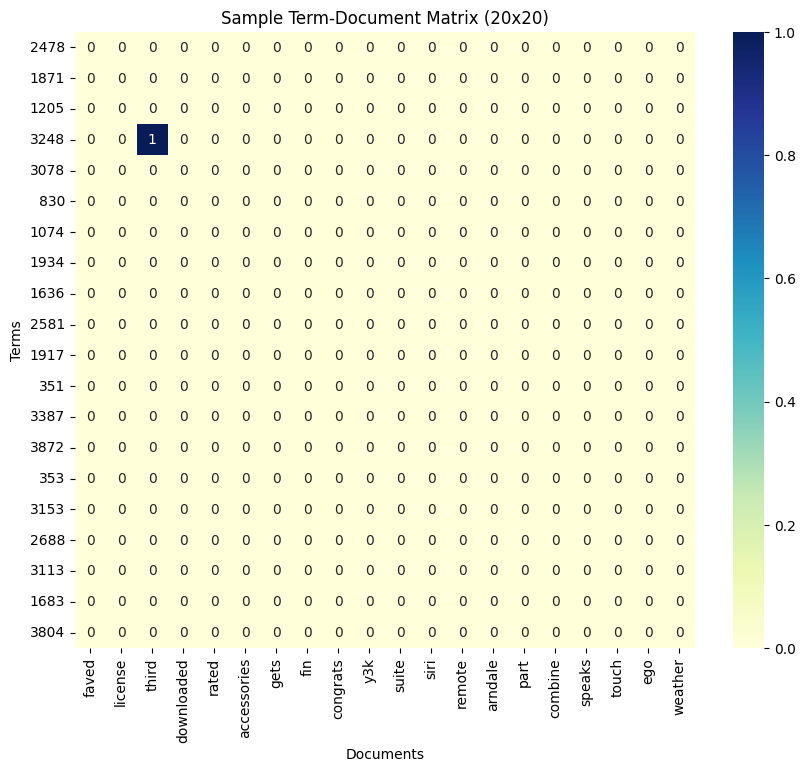

In [30]:
num_rows, num_cols = term_document_matrix.shape

# Generate random indices for sampling
sample_rows = np.random.choice(num_rows, size=20, replace=False)
sample_cols = np.random.choice(num_cols, size=20, replace=False)

# Sample term-document matrix (replace `term_document_matrix` with your actual matrix)
term_document_matrix_sample = term_document_matrix.iloc[sample_rows, sample_cols]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(term_document_matrix_sample, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Sample Term-Document Matrix (20x20)')
plt.xlabel('Documents')
plt.ylabel('Terms')
plt.show()
